# Hyperparameter Tunning

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [60]:
data=load_iris()
feature=data.data
target=data.target

In [61]:
df1=pd.DataFrame(feature,columns=data.feature_names)
df2=pd.Series(target)

In [62]:
final=pd.concat([df1,df2],axis=1).rename(columns={0:"target"})
final=final[["sepal length (cm)",'petal width (cm)',"target"]]

In [63]:
final.head(1)

,sepal length (cm),petal width (cm),target
0,5.1,0.2,0


# Train test split

In [64]:
from sklearn.model_selection import train_test_split,cross_val_score

In [65]:
x_train,x_test,y_train,y_test=train_test_split(final.drop(columns=['target']),final['target'],test_size=0.2,random_state=35)

In [66]:
x_train

,sepal length (cm),petal width (cm)
7,5.0,0.2
70,5.9,1.8
106,4.9,1.7
22,4.6,0.2
75,6.6,1.4
...,...,...
57,4.9,1.0
147,6.5,2.0
139,6.9,2.1
33,5.5,0.2


# Build Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model=LogisticRegression(penalty='l2')
model.fit(x_train,y_train)

LogisticRegression()

In [69]:
pre=model.predict(x_test)
pre

array([1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 2, 0, 2])

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [71]:
accuracy_score(y_test,pre)

1.0

In [72]:
confusion_matrix(y_test,pre)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

In [73]:
cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy").mean()

0.95

In [74]:
cross_val_score(model,x_test,y_test,cv=5,scoring="accuracy").mean()

0.9666666666666666

In [75]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

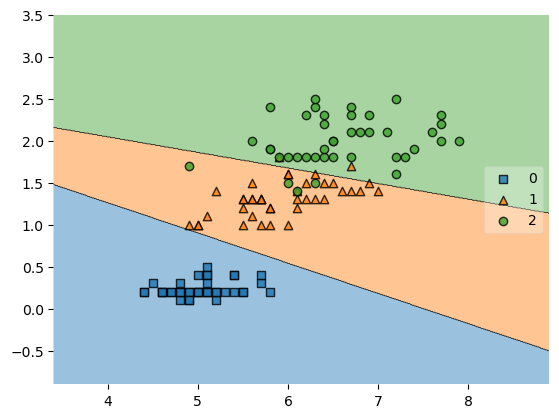

In [78]:
plot_decision_regions(x_train.values,y_train.values,clf=model,legend=5)

# Hyperparameter Tunning

In [44]:
# model={
#     "logisticRegression":LogisticRegression()
# }

In [45]:
# params={
    
# }